# Boston Housing Price Predictions

## Features Description
- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per $10,000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

## Importing the Libraries and loading datasets

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.datasets import load_boston 
boston = load_boston()

In [4]:
df = pd.DataFrame(boston["data"])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["Price"] = pd.Series(boston["target"])

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploring Data

In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


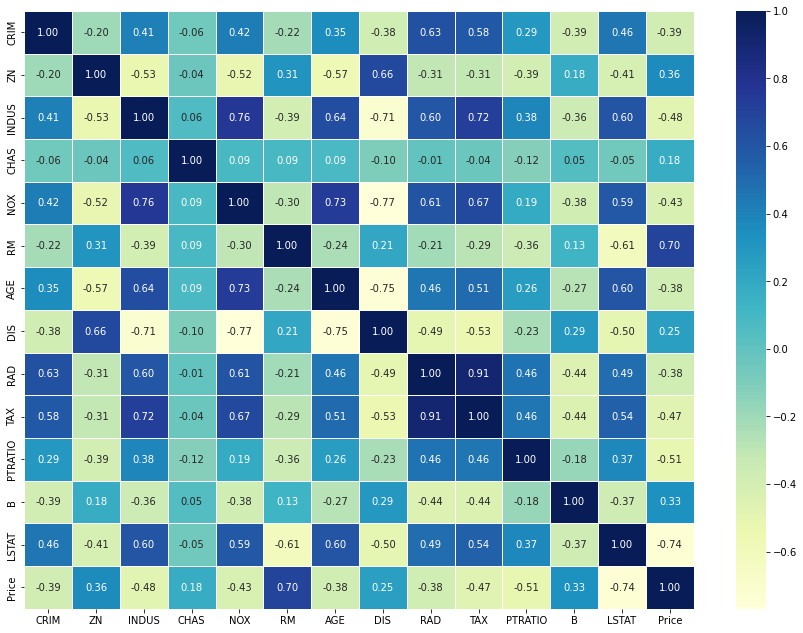

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 11))
ax = sns.heatmap(
    corr_matrix,
    annot=True, 
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.8
)

## Splitting data

In [14]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [15]:
X.shape, y.shape

((506, 13), (506,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## Training Model using Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
model.score(X_test, y_test)

0.7525418785996123

In [19]:
y_preds = model.predict(X_test)
y_preds

array([23.838, 26.552, 22.176, 11.109, 20.789, 20.635, 21.029, 20.031,
       20.719, 19.153,  8.016, 15.101, 15.311,  8.36 , 46.779, 34.378,
       21.214, 34.664, 25.535, 21.207, 23.688, 21.844, 20.008, 24.45 ,
       20.036, 17.605, 18.776, 16.396, 43.195, 19.302, 14.706, 17.786,
       20.79 , 21.343, 23.058, 18.442,  8.608, 26.581, 14.413, 15.498,
       23.072, 20.837, 22.411, 14.748, 24.309, 22.496, 21.111, 16.914,
       14.282, 25.381, 16.658, 19.622, 21.94 , 39.616, 14.724, 21.4  ,
       19.445, 19.306, 21.183, 20.187, 21.274, 21.476, 32.812, 28.806,
       18.368, 26.935, 16.151, 21.14 , 18.492, 21.805, 20.851, 22.97 ,
       24.391, 30.756, 29.798,  8.333, 42.916, 22.481, 22.843, 20.547,
       26.631, 18.422, 21.512, 42.261, 41.179, 24.504, 22.89 , 14.417,
       25.969, 16.325, 19.681, 12.287, 22.598, 29.728, 20.727, 21.771,
       11.543, 23.382, 14.93 , 19.002, 23.882, 20.192])

In [20]:
y_train, y_preds

(220    26.7
 71     21.7
 240    22.0
 6      22.9
 417    10.4
        ... 
 323    18.5
 192    36.4
 117    19.2
 47     16.6
 172    23.1
 Name: Price, Length: 404, dtype: float64,
 array([23.838, 26.552, 22.176, 11.109, 20.789, 20.635, 21.029, 20.031,
        20.719, 19.153,  8.016, 15.101, 15.311,  8.36 , 46.779, 34.378,
        21.214, 34.664, 25.535, 21.207, 23.688, 21.844, 20.008, 24.45 ,
        20.036, 17.605, 18.776, 16.396, 43.195, 19.302, 14.706, 17.786,
        20.79 , 21.343, 23.058, 18.442,  8.608, 26.581, 14.413, 15.498,
        23.072, 20.837, 22.411, 14.748, 24.309, 22.496, 21.111, 16.914,
        14.282, 25.381, 16.658, 19.622, 21.94 , 39.616, 14.724, 21.4  ,
        19.445, 19.306, 21.183, 20.187, 21.274, 21.476, 32.812, 28.806,
        18.368, 26.935, 16.151, 21.14 , 18.492, 21.805, 20.851, 22.97 ,
        24.391, 30.756, 29.798,  8.333, 42.916, 22.481, 22.843, 20.547,
        26.631, 18.422, 21.512, 42.261, 41.179, 24.504, 22.89 , 14.417,
        25.969, 16.325

In [21]:
from sklearn import metrics

print(f"R^2: {metrics.r2_score(y_test, y_preds)}")
print(f"Adjusted R^2: {1 - (1-metrics.r2_score(y_test, y_preds))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_preds))}")

R^2: 0.7525418785996123
Adjusted R^2: 0.7159855652109186
MAE: 2.684676470588237
MSE: 20.150128558823543
RMSE: 4.488889457184655


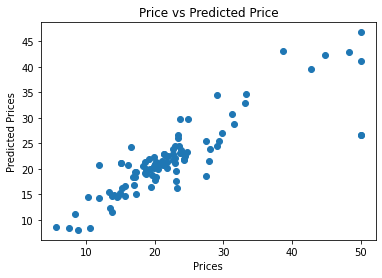

In [24]:
plt.scatter(y_test, y_preds)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Price vs Predicted Price")
plt.show()